In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd
import libpysal
import numpy as np
from libpysal.weights.contiguity import Queen
from libpysal.weights import Queen, Rook, KNN
from splot.libpysal import plot_spatial_weights

In [69]:
path = 'powiaty/powiaty.shp'
# https://github.com/Toblerity/Fiona/issues/548
gdf = gpd.read_file(path)
for i in range(len(gdf.jpt_nazwa_)):
    gdf.jpt_nazwa_[i] = gdf.jpt_nazwa_[i].encode("latin1","strict").decode('utf-8')
#print(gdf.head())

/home/marek/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [70]:
gdf

iip_przest                            iip_identy jpt_sjr_ko jpt_kod_je  \
0    PL.PZGIK.200  07f182b1-9146-43e5-a62d-836c211f9ff1        POW       0226   
1    PL.PZGIK.200  c845cab0-9fbf-4123-9fc3-c70e57ad17fb        POW       0262   
2    PL.PZGIK.200  139e17ec-bbd6-410b-80c0-da7faea2a439        POW       0206   
3    PL.PZGIK.200  65b5a197-3d86-401c-8cea-ea80c3b4bf7c        POW       0204   
4    PL.PZGIK.200  258b68f9-31cb-4f37-bbdf-f1824805a0e4        POW       0214   
5    PL.PZGIK.200  275bb110-6b8f-4f24-873d-abbb862c02a6        POW       0201   
6    PL.PZGIK.200  f874c206-4613-483b-b34d-feaa8e657dbf        POW       0261   
7    PL.PZGIK.200  597109f2-464f-46ec-a568-d55db9996a9a        POW       0208   
8    PL.PZGIK.200  16833a82-0027-41ad-903e-f3b50b74b6fd        POW       0210   
9    PL.PZGIK.200  387f7282-f74e-4cad-ac49-fab6a947a1fa        POW       0221   
10   PL.PZGIK.200  6e4b2d8b-4559-4329-a4c9-eefdb5c5eb89        POW       0202   
11   PL.PZGIK.200  a38a696f-defb-46a1-8387-a51f0009e992        POW       0220   
12   PL.PZGIK.200  f6753ea2-1749-4460-9a52-ae8524c5b67b        POW       0203   
13   PL.PZGIK.200  35e40755-7070-4ff7-bec7-b90773de500e        POW       0265   
14   PL.PZGIK.200  2b31d9fc-86a8-4b09-bf78-f92e5102ac02        POW       0222   
15   PL.PZGIK.200  4f25419a-a5aa-4b2f-beae-fc79c7e2eac4        POW       0225   
16   PL.PZGIK.200  3c84e4e6-19b3-4595-b27a-f6bc2afc1c5f        POW       0223   
17   PL.PZGIK.200  b08323b4-b45c-4684-a854-f4e5f6822957        POW       0224   
18   PL.PZGIK.200  9d7a0ea7-4d52-4f6b-a185-c8a936064b15        POW       0215   
19   PL.PZGIK.200  e7cc172b-b217-44c5-aa19-8424ca9c1c03        POW       0216   
20   PL.PZGIK.200  9bb7e883-7147-4712-b5b1-fa8e1aa2eb4d        POW       0218   
21   PL.PZGIK.200  74bb64a5-d003-46ee-8c20-d52ee6b696e1        POW       0205   
22   PL.PZGIK.200  c4120d3e-4c12-4f5f-be92-820c1b233691        POW       0213   
23   PL.PZGIK.200  880dfee6-510b-4e24-be41-b5e6142832be        POW       0207   
24   PL.PZGIK.200  57be7ce8-4911-4ce5-9ed8-f9411e89e847        POW       0217   
25   PL.PZGIK.200  60586afd-58bc-4d23-8238-bf4f4756d789        POW       0219   
26   PL.PZGIK.200  78b9fce1-9235-441b-87c5-f80aaf16b801        POW       0209   
27   PL.PZGIK.200  3fa081d3-e6b9-4653-9cd3-c7dd6f53ea81        POW       0264   
28   PL.PZGIK.200  2f4596d4-19cd-472a-9915-ac7b52a66a3c        POW       0211   
29   PL.PZGIK.200  6ea4132e-7a30-4765-b2aa-8bd493dc2375        POW       0212   
..            ...                                   ...        ...        ...   
350  PL.PZGIK.200  ffd85c8f-62a0-4e49-8d0f-f462fa7d1020        POW       3004   
351  PL.PZGIK.200  79a80ae4-6ccf-4435-bf14-8a92a75a3fe4        POW       3018   
352  PL.PZGIK.200  5428dbc9-d8cd-4c70-8562-a67ce2f3e5d8        POW       3063   
353  PL.PZGIK.200  17d1a859-cb58-476e-9baa-f2cb36688e05        POW       3206   
354  PL.PZGIK.200  c37bd998-ab49-436d-8b00-f783df29346e        POW       3211   
355  PL.PZGIK.200  cb15d438-7255-4433-9c75-89c68944956c        POW       3208   
356  PL.PZGIK.200  26a963f2-7949-44c6-9090-835927aaa19b        POW       3261   
357  PL.PZGIK.200  0524e545-228b-4b68-80f8-cdf69528a59f        POW       3262   
358  PL.PZGIK.200  70c52407-979d-44b2-aa7b-90fe83cb3a71        POW       3217   
359  PL.PZGIK.200  2963177a-d9bc-4ceb-a68d-d83150a65edb        POW       3218   
360  PL.PZGIK.200  8e8009b0-9e3e-41b7-a236-ed8b2e31ca0b        POW       3263   
361  PL.PZGIK.200  50fe0ae9-37af-4daa-ba99-a6864c4c34dc        POW       3212   
362  PL.PZGIK.200  e7df1d0c-30d0-4e31-9ce5-af88ca2302f5        POW       3213   
363  PL.PZGIK.200  fc0bca5a-2158-46aa-8904-d8583c5ac4ef        POW       3215   
364  PL.PZGIK.200  1a76269e-3e01-40fd-a39b-b5e35a325f9b        POW       3216   
365  PL.PZGIK.200  b832e274-346c-4551-b312-80aa8ccfd59b        POW       3214   
366  PL.PZGIK.200  652f6c52-e721-4c44-818a-94061386603b        POW       3209   
367  PL.PZGIK.200  f6f1a1e7-a8df-4d76-

In [4]:
weights = Queen.from_dataframe(gdf)

/home/marek/.local/lib/python3.6/site-packages/libpysal/weights/weights.py:170: UserWarning: The weights matrix is not fully connected. There are 2 components
  warnings.warn("The weights matrix is not fully connected. There are %d components" % self.n_components)


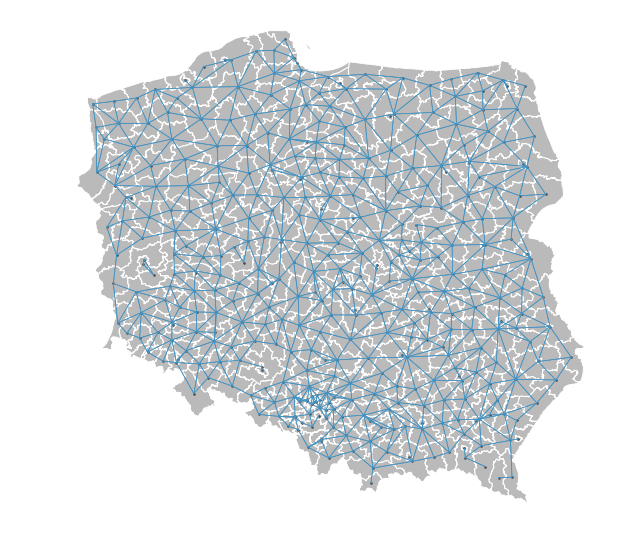

In [5]:
plot_spatial_weights(weights, gdf)
plt.show()

In [6]:
contig_matrix = libpysal.weights.Rook.from_shapefile(path)

# build list of edges - this will create edges going both ways from connected nodes, so you might need to remove duplicates
nodes = contig_matrix.weights.keys()  # to get dict of keys, alternatively use contig_matrix.id2i.keys()
edges = [(node, neighbour) for node in nodes for neighbour in contig_matrix[node]]
my_graph = nx.Graph(edges)

/home/marek/.local/lib/python3.6/site-packages/libpysal/weights/weights.py:168: UserWarning: There are 3 disconnected observations 
  Island ids: 13, 200, 257
  " Island ids: %s" % ', '.join(str(island) for island in self.islands))


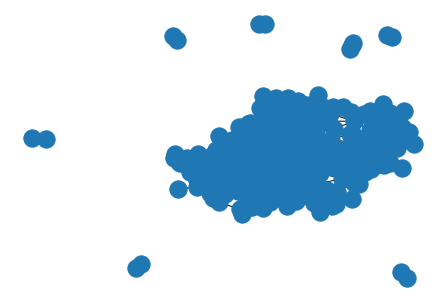

In [7]:
nx.draw(my_graph)  # networkx draw()
plt.draw()  # pyplot draw()
plt.show()

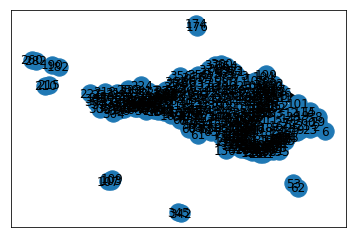

In [8]:
nx.draw_networkx(my_graph, width=10)
#plt.figure(figsize=(100,100))
plt.draw()  # pyplot draw()
plt.show()

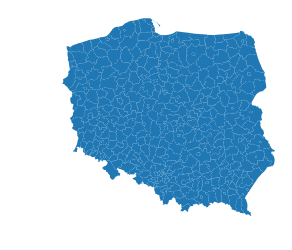

In [9]:
gdf = gpd.read_file(path)
ax = gdf.plot()
ax.set_axis_off()

In [10]:
w_rook = Rook.from_dataframe(gdf)
w_queen = Queen.from_dataframe(gdf)
#https://github.com/pysal/libpysal/blob/master/notebooks/weights.ipynb

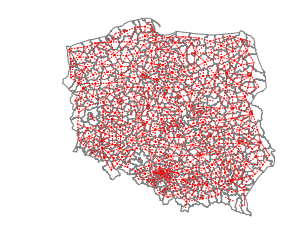

In [11]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = w_rook.plot(gdf, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

In [12]:
w_queen.neighbors

{0: [2, 21, 5, 26, 29],
 1: [26],
 2: [0, 21, 6, 23, 29],
 3: [322, 102, 11, 12, 28, 14, 335],
 4: [330, 11, 16, 18, 22, 186, 318, 351],
 5: [0, 114, 19, 8, 26, 29, 15],
 6: [2],
 7: [17, 10, 9],
 8: [29, 5, 15],
 9: [7, 21, 23, 25, 10, 13],
 10: [16, 17, 7, 24, 25, 9],
 11: [3, 4, 14, 335, 16, 20, 22, 27],
 12: [114, 3, 19, 102, 28],
 13: [9, 25],
 14: [3, 20, 26, 11, 28],
 15: [8, 114, 101, 5],
 16: [4, 10, 11, 18, 20, 24, 25, 27],
 17: [24, 10, 179, 7],
 18: [16, 4, 24, 185, 186],
 19: [114, 5, 26, 12, 28],
 20: [16, 21, 11, 25, 26, 27, 14],
 21: [0, 2, 20, 23, 9, 26, 25],
 22: [338, 4, 330, 11, 335],
 23: [9, 2, 21],
 24: [16, 17, 18, 179, 185, 10],
 25: [16, 20, 21, 9, 10, 13],
 26: [0, 1, 5, 14, 19, 20, 21, 28],
 27: [16, 11, 20],
 28: [19, 3, 26, 12, 14],
 29: [0, 8, 2, 5],
 30: [48, 39],
 31: [49],
 32: [44, 47],
 33: [324, 319, 40, 41, 47],
 34: [50, 326, 328, 43, 46],
 35: [178, 37, 42, 44, 159],
 36: [48, 239, 43, 46, 235],
 37: [49, 35, 42, 44, 45],
 38: [48, 49, 39, 43, 45

In [13]:
w_rook.neighbors

{0: [2, 21, 5, 26, 29],
 1: [26],
 2: [0, 21, 6, 23, 29],
 3: [322, 102, 11, 28, 12, 14, 335],
 4: [330, 11, 16, 18, 22, 186, 318, 351],
 5: [0, 114, 19, 8, 26, 29, 15],
 6: [2],
 7: [17, 10, 9],
 8: [29, 5, 15],
 9: [7, 21, 23, 25, 10],
 10: [16, 17, 7, 24, 9, 25],
 11: [3, 4, 14, 335, 16, 20, 22, 27],
 12: [114, 19, 3, 102, 28],
 13: [],
 14: [3, 20, 26, 11, 28],
 15: [8, 114, 5, 101],
 16: [4, 10, 11, 18, 20, 24, 25, 27],
 17: [24, 10, 179, 7],
 18: [16, 4, 24, 185, 186],
 19: [114, 5, 26, 28, 12],
 20: [16, 21, 27, 25, 26, 11, 14],
 21: [0, 2, 20, 23, 9, 26, 25],
 22: [338, 4, 330, 11, 335],
 23: [9, 2, 21],
 24: [16, 17, 18, 179, 185, 10],
 25: [16, 20, 21, 9, 10],
 26: [0, 1, 5, 14, 19, 20, 21, 28],
 27: [16, 11, 20],
 28: [19, 3, 26, 12, 14],
 29: [0, 8, 2, 5],
 30: [48, 39],
 31: [49],
 32: [44, 47],
 33: [324, 319, 40, 41, 47],
 34: [50, 326, 328, 43, 46],
 35: [178, 37, 42, 44, 159],
 36: [48, 239, 43, 46, 235],
 37: [49, 35, 42, 44, 45],
 38: [48, 49, 39, 43, 45],
 39: [38, 

In [14]:
w_rook.islands
#https://libpysal.readthedocs.io/en/latest/generated/libpysal.weights.Rook.html

[13, 200, 257]

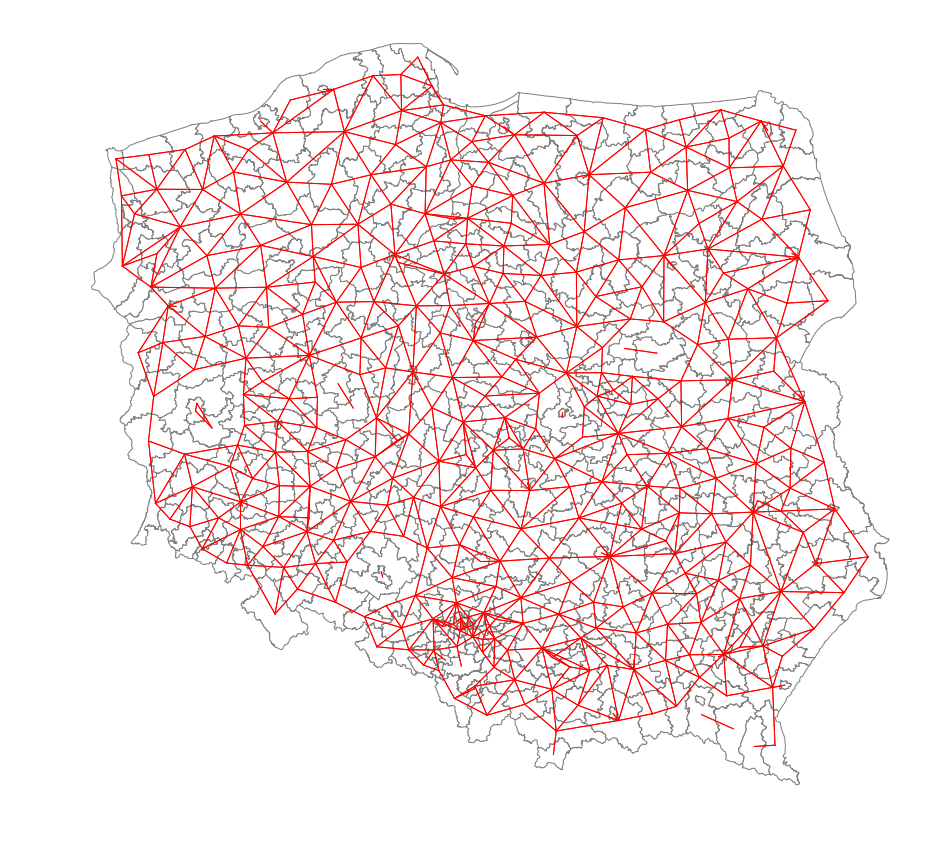

In [15]:
rs_df = gpd.read_file(path)

plt.rcParams["figure.figsize"] = (20,15)

ax = rs_df.plot(edgecolor='grey', facecolor='w')
f,ax = w_rook.plot(rs_df, ax=ax, 
        edge_kws=dict(color='r', linestyle='-', linewidth=1),
        node_kws=dict(marker=''))
#ax.set_title('Rio Grande do Sul: Nonplanar Weights')
ax.set_axis_off()

In [71]:
#http://www.geraintianpalmer.org.uk/2017/09/22/plotting-geopandas/
powiaty = gdf#.dissolve(by='jpt_nazwa_') #changes the index to names of dostricts

In [74]:
powiaty

geometry  \
jpt_nazwa_                                                               
Biała Podlaska       POLYGON ((778720.978496816 470882.528798889, 7...   
Białystok            POLYGON ((771905.526148951 592432.192559302, 7...   
Bielsko-Biała        POLYGON ((496070.662833074 209573.063219232, 4...   
Bydgoszcz            POLYGON ((424721.984526221 586919.2909570551, ...   
Bytom                POLYGON ((484976.667770651 280624.949737961, 4...   
Chełm                POLYGON ((808995.029962617 374058.737626974, 8...   
Chorzów              POLYGON ((494231.054644117 270592.598567145, 4...   
Częstochowa          POLYGON ((500793.078939961 324472.402174512, 5...   
Dąbrowa Górnicza     POLYGON ((511079.070153294 273954.298874867, 5...   
Elbląg               POLYGON ((523436.277337984 699976.001713526, 5...   
Gdańsk               POLYGON ((479414.084840395 726812.486986868, 4...   
Gdynia               (POLYGON ((462332.8667781493 735228.2737092497...   
Gliwice              POLYGON ((467486.470992821 274452.971988308, 4...   
Gorzów Wielkopolski  POLYGON ((238434.158257864 546544.64856946, 23...   
Grudziądz            POLYGON ((479162.603537234 618566.782388073, 4...   
Jastrzębie-Zdrój     POLYGON ((465163.252255489 230038.515374552, 4...   
Jaworzno             POLYGON ((511468.719107431 262151.767604441, 5...   
Jelenia Góra         POLYGON ((258831.052330533 329113.697349054, 2...   
Kalisz               POLYGON ((430634.451796402 431003.768699461, 4...   
Katowice             POLYGON ((492290.785204225 262913.383085855, 4...   
Kielce               POLYGON ((606284.76541322 333273.271187246, 60...   
Konin                POLYGON ((444878.300423715 485614.97406268, 44...   
Koszalin             POLYGON ((311663.512195382 710292.64270548, 31...   
Kraków               POLYGON ((556750.360719466 238631.372739458, 5...   
Krosno               POLYGON ((694217.67940326 208053.75352877, 694...   
Legnica              POLYGON ((296226.608764245 372333.782926137, 2...   
Leszno               POLYGON ((329718.996079133 443896.57146363, 32...   
Lublin               POLYGON ((741160.6207099929 377716.59012578, 7...   
Mysłowice            POLYGON ((504810.680904054 259634.856525637, 5...   
Nowy Sącz            POLYGON ((619148.56191445 192164.104127325, 61...   
...                                                                ...   
ząbkowicki           POLYGON ((328875.62770634 310176.543277175, 32...   
złotoryjski          POLYGON ((269083.615610161 370884.074692226, 2...   
złotowski            POLYGON ((329997.3566725 625101.700811027, 330...   
Łomża                POLYGON ((701197.66607517 593674.421365144, 70...   
Łódź                 POLYGON ((522115.732761941 438017.771662048, 5...   
łaski                POLYGON ((486303.072256634 393604.38664675, 48...   
łańcucki             POLYGON ((720281.530732206 260551.67357321, 72...   
łobeski              POLYGON ((244780.878461781 640082.514994552, 2...   
łomżyński            POLYGON ((674854.77101438 603283.617936219, 67...   
łosicki              POLYGON ((743608.689577573 481591.605684734, 7...   
łowicki              POLYGON ((535126.370817947 468358.75144187, 53...   
łukowski             POLYGON ((695873.294953509 446404.940977782, 6...   
łódzki wschodni      POLYGON ((528986.819955728 418398.968620465, 5...   
łęczycki             POLYGON ((488233.363299021 466498.446054029, 4...   
łęczyński            POLYGON ((754987.9286579289 395734.203140168, ...   
Świnoujście          POLYGON ((183959.011118568 682913.138447486, 1...   
Świętochłowice       POLYGON ((491708.764867022 269770.940734702, 4...   
średzki              (POLYGON ((313057.774806108 356701.864309089, ...   
śremski              POLYGON ((348830.491323519 477266.464284332, 3...   
świdnicki            (POLYGON ((300541.921255645 346488.6673186, 30...   
świdwiński           POLYGON ((271944.214193684 674838.783434418, 2...   
świebodziński        POLYGON ((232994.530956662 491647.692397726, 

In [66]:
#for i in range(len(powiaty.jpt_nazwa_)):
#    powiaty.jpt_nazwa_[i] = powiaty.jpt_nazwa_[i].encode("latin1","strict").decode('utf-8')
#print(powiaty.jpt_nazwa_)

/home/marek/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0         złotoryjski
1             Legnica
2       jeleniogórski
3            górowski
4           oleśnicki
5       bolesławiecki
6        Jelenia Góra
7             kłodzki
8            lubański
9          wałbrzyski
10     dzierżoniowski
11         trzebnicki
12          głogowski
13          Wałbrzych
14           wołowski
15        zgorzelecki
16         wrocławski
17         ząbkowicki
18            oławski
19         polkowicki
20            średzki
21           jaworski
22            milicki
23     kamiennogórski
24        strzeliński
25          świdnicki
26           legnicki
27            Wrocław
28           lubiński
29           lwówecki
            ...      
350         gostyński
351     ostrzeszowski
352            Leszno
353         gryfiński
354           policki
355       kołobrzeski
356          Koszalin
357          Szczecin
358           wałecki
359           łobeski
360       Świnoujście
361          pyrzycki
362        sławieński
363      szczecinecki
364       

In [72]:
powiaty['centroid'] = powiaty['geometry'].centroid

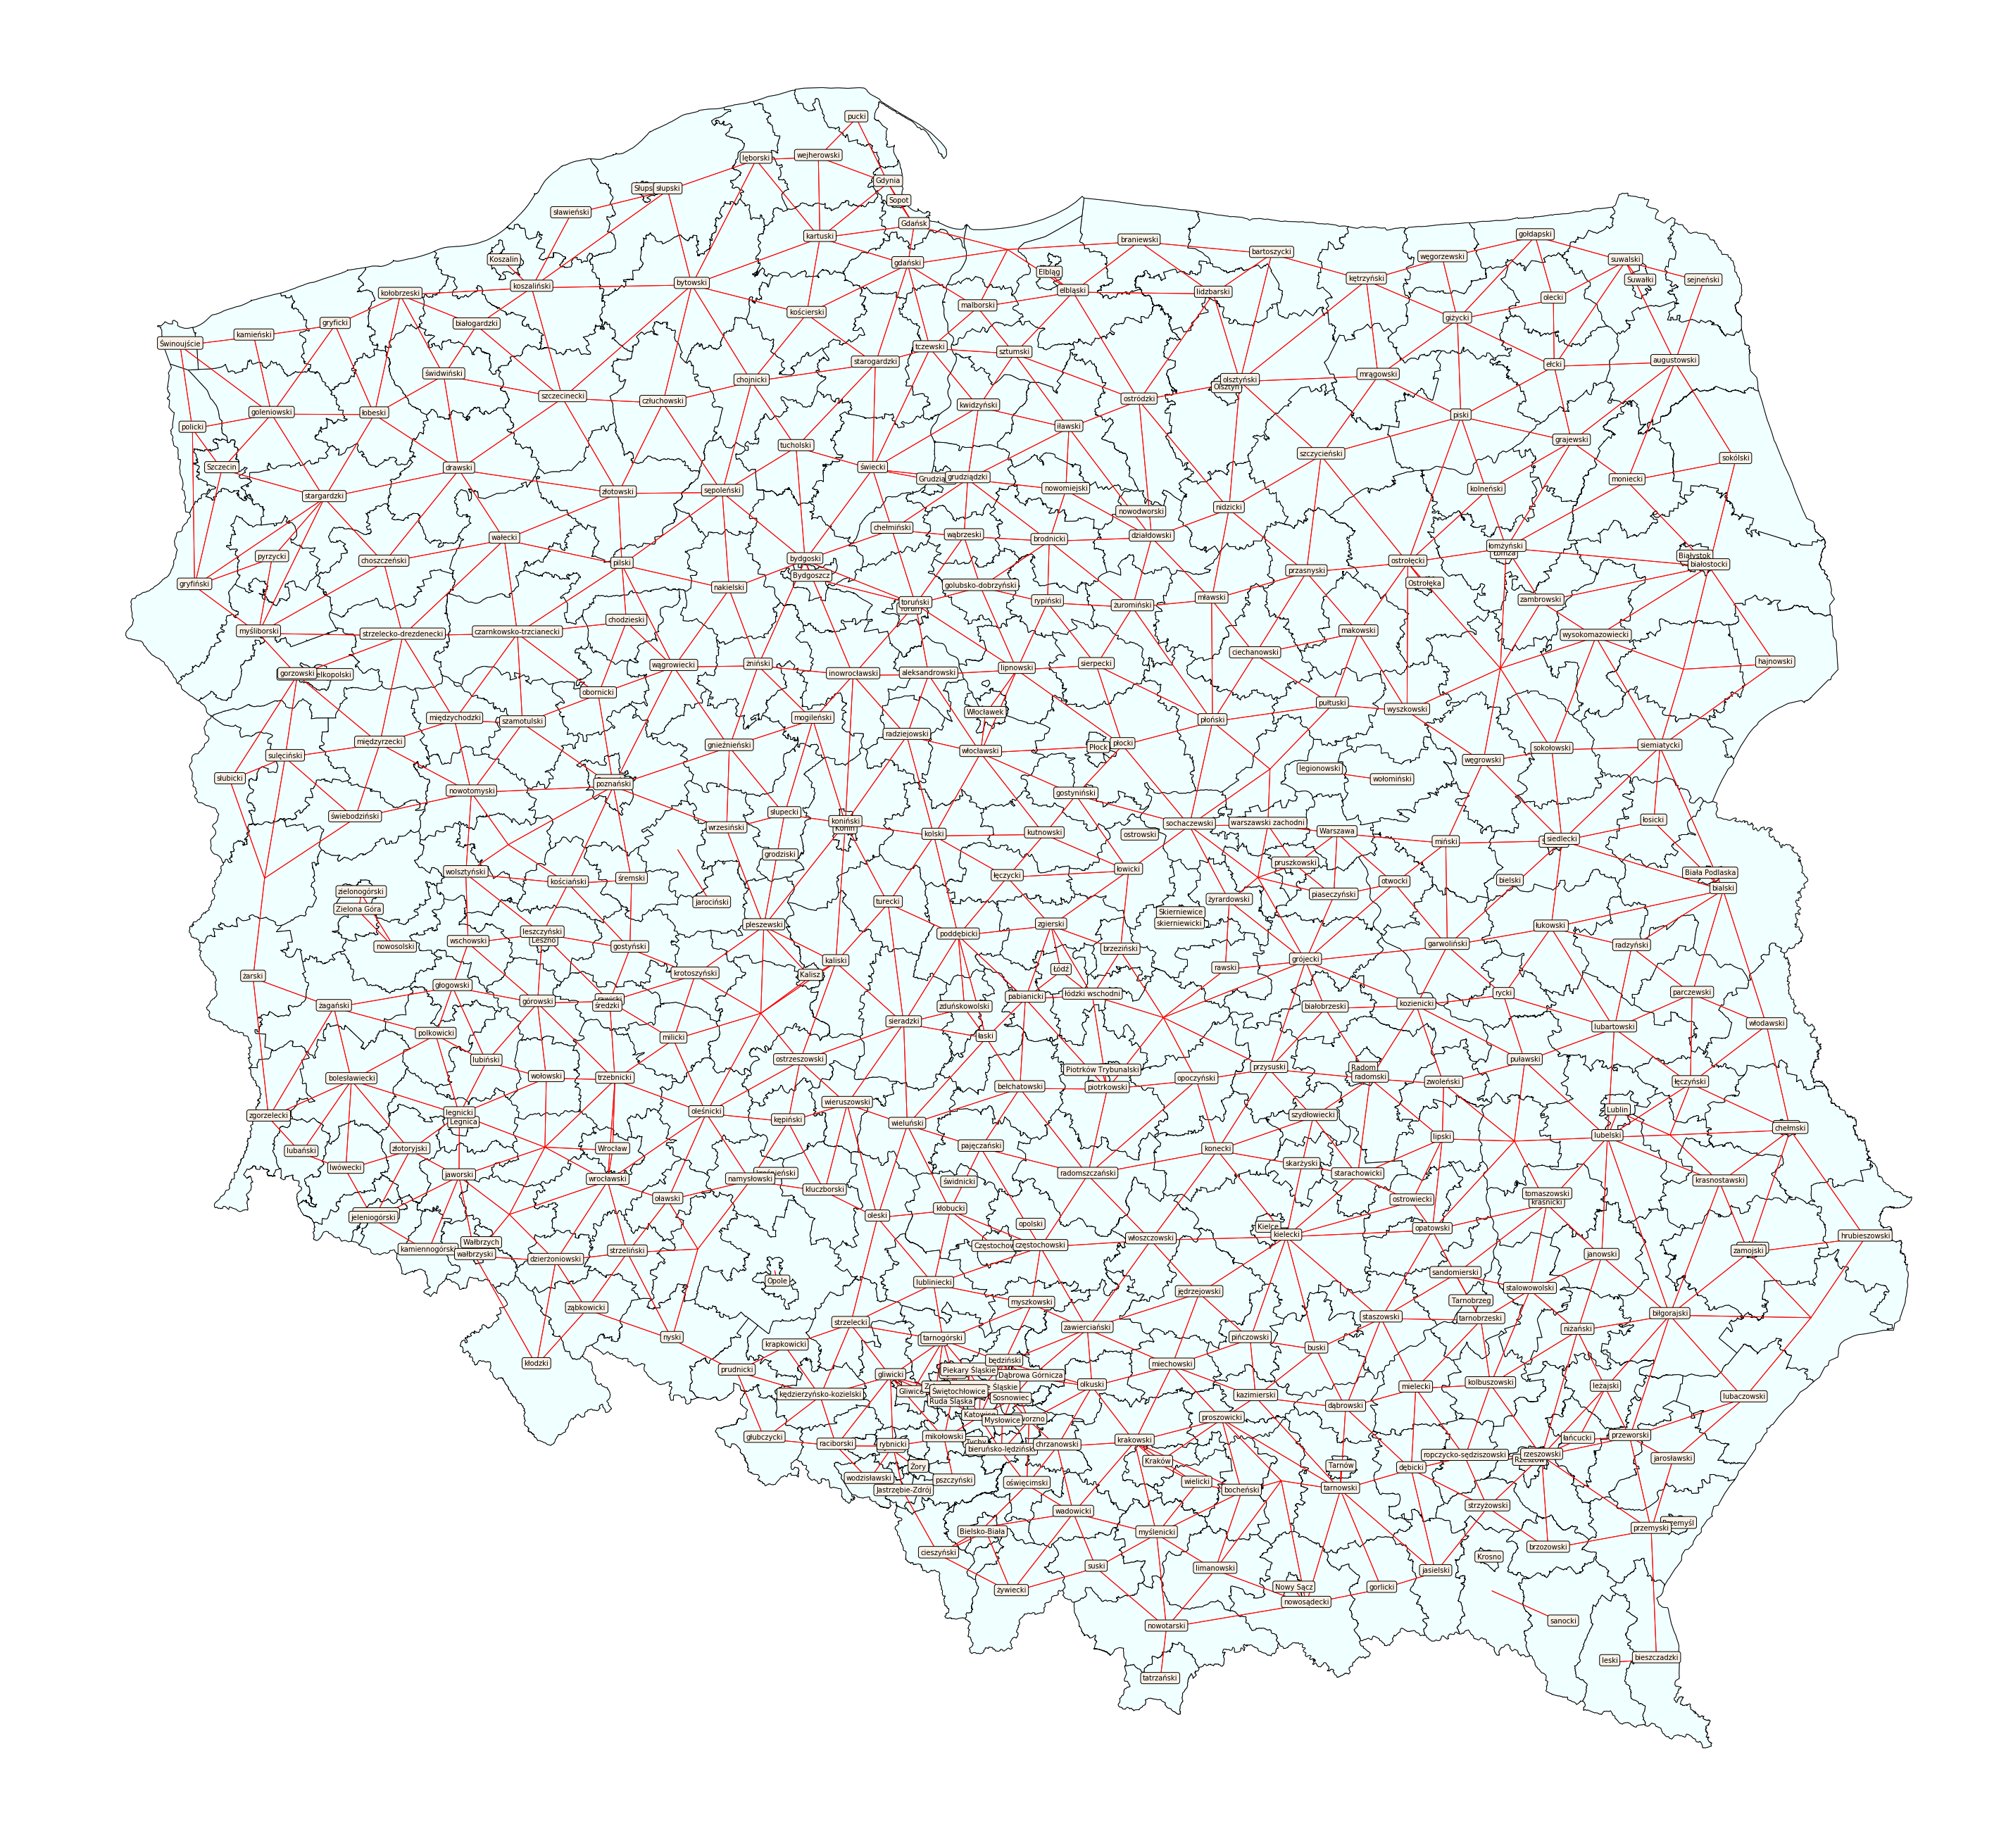

In [73]:
plt.rcParams["figure.figsize"] = (50,50)

ax = rs_df.plot(edgecolor='grey', facecolor='w')
fig, ax = w_rook.plot(rs_df, ax=ax, 
        edge_kws=dict(color='r', linestyle='-', linewidth=1),
        node_kws=dict(marker=''))
#plt.subplots(1, figsize=(50,50))
powiaty.plot(color='azure', edgecolor='black', ax=ax)
props = dict(boxstyle='round', facecolor='linen', alpha=1)
for point in powiaty.iterrows():
    ax.text(point[1]['centroid'].x,
            point[1]['centroid'].y,
            point[0],
            horizontalalignment='center',
            fontsize=10,
            bbox=props)

ax.axis('off')
plt.savefig('powiaty.png')